In [27]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(0, '..')

from sim.LoadBalancer import LoadBalancer
from sim.Source import AutoRegressiveArrivalSchedule, Source, ExponentialSource
from sim.Environment import Environment
from sim.GELoadBalancer import GreedyEpsilonLoadBalancer
import numpy as np
import random
import matplotlib.pyplot as plt
import math

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Arrival process
use number of arrivals and number of cancelled to define autoregressive process

In [18]:
def sigmoid(x):
      return 1 / (1 + np.exp(-x))

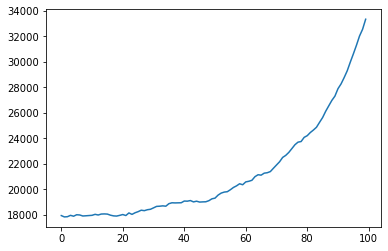

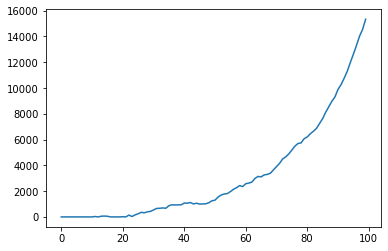

In [23]:
X0 = np.array([18000, 0])
X = X0
A = np.array([1,0.05])
arrivalProcess = lambda X: X.T @ A 

arr = []
canc = []
for i in range(0,100):
    arrs  = arrivalProcess(X) + random.normalvariate(0,100)
    arr.append(arrs)
    cancelled = max(arrs-18000,0)
    canc.append(cancelled)
    X = np.array([arrs, cancelled])

plt.plot(arr)
plt.figure()
plt.plot(canc)


### Test the process

In [7]:
def sigmoid(x):
      return 1 / (1 + np.exp(-x))

In [29]:
#from sklearn.linear_model import LinearRegression
#from sklearn.tree import DecisionTreeRegressor
#from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor

stopTime = 10*24*60*60
env = Environment(stopTime=stopTime)

#model = LinearRegression()
#model = DecisionTreeRegressor()
#model  = MLPRegressor(hidden_layer_sizes=[10], activation='tanh')
model  = RandomForestRegressor(n_estimators=10)
eta = lambda t: sigmoid(2-0.01*t)
#eta = 0.4
#sigmoid(2/(0.1*t+2)-0.5)
periodLength = 1*60*60 #half an hour per period -> schedule repeated two times in 12 hours
loadBalancer = GreedyEpsilonLoadBalancer(nServers=10, environment=env, model = model, eta=eta, nServerRange=[10,30], usePartialFit=False, periodLength=periodLength)

requestTypes = [(0.5,1,0.1,10), (0.5,2,0.2,10)] #(prob, mu, sigma, cancelTime)
arrivalsPerSecond = 10 #starting value
source = ExponentialSource(arrivalsPerSecond, requestTypes, loadBalancer, env)

schedule = np.array([arrivalsPerSecond]) #12 periods
arrivalSchedule = AutoRegressiveArrivalSchedule(periodLength,arrivalSchedule=schedule, environment=env, loadBalancer=loadBalancer, source=source, maxArrivals=20, A=[0,1,0,0,0,0.1,0])
env.run(debug=False)

36405 2219 10 11215.0
17
npa 10.139136046703435
36375 8 17 31195.0
nan
(1, 8) (1, 1)
28
npa 10.12759902338001


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored
/Users/julianvanmeggelen/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


36263 0.0 28 27863.0
0.47999999999999987
(2, 8) (2, 1)
26
npa 10.061128149676337


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36017 0.0 26 28217.0
0.8265699622970193
(3, 8) (3, 1)
29
npa 10.016455012830928


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36113 0.0 29 27413.0
0.8650115409284216
(4, 8) (4, 1)
27
npa 10.053600450293652


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36412 0.0 27 28312.0
0.7887185608553623
(5, 8) (5, 1)
14
npa 10.095531653481967


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36490 796 14 24330.0
0.7529752808938432
(6, 8) (6, 1)
13
npa 10.18009180687348


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36815 1266 13 20255.0
0.8187216625238357
(7, 8) (7, 1)
30
npa 10.219432411128437


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36845 8 30 27765.0
0.6646565764016863
(8, 8) (8, 1)
Max reward for 27515.2 21
21
npa 10.20103792473027


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36686 0.0 21 30386.0
0.787542405463004
(9, 8) (9, 1)
12
npa 10.132861965385178


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36606 1722 12 15786.0
0.7725796669863865
(10, 8) (10, 1)
12
npa 10.152048524771216


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36708 1652 12 16588.0
0.7915105394246698
(11, 8) (11, 1)
10
npa 10.211680227639444


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36840 2296 10 10880.0
0.868021683643645
(12, 8) (12, 1)
Max reward for 26169.7 20
20
npa 10.249415903672457


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37080 6 20 31020.0


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


0.9745065307128166
(13, 8) (13, 1)
22
npa 10.300720591870704
36816 0.0 22 30216.0
0.9643314927097795
(14, 8) (14, 1)
26
npa 10.167134814996745


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36603 0.0 26 28803.0
0.9768400024133523
(15, 8) (15, 1)


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


Max reward for 28434.9 21
21
npa 10.134865923953194
36900 0.0 21 30600.0
0.9718818058028449
(16, 8) (16, 1)
Max reward for 28478.3 21
21
npa 10.232812399017588


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36891 0.0 21 30591.0
0.9532564220826886
(17, 8) (17, 1)
11
npa 10.200345696079282


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37021 2091 11 12811.0
0.9715977184732192
(18, 8) (18, 1)
25
npa 10.219627035813382


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37044 3 25 29514.0
0.9698538234587597
(19, 8) (19, 1)
11
npa 10.293226326228826


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36645 1984 11 13505.0
0.9812290953944358
(20, 8) (20, 1)


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


Max reward for 27888.4 18
18
npa 10.180661371361756
36880 7 18 31410.0
0.9857169070554465
(21, 8) (21, 1)
24
npa 10.249854345142603


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37104 0.0 24 29904.0
0.983429411447329
(22, 8) (22, 1)
15
npa 10.35241675197691


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37134 517 15 27464.0
0.9841114181841805
(23, 8) (23, 1)
17
npa 10.3259796658118


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37329 27 17 31959.0
0.978860008015381
(24, 8) (24, 1)


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


Max reward for 28569.5 17
17
npa 10.372844820612753
37253 12 17 32033.0
0.9912851966696901
(25, 8) (25, 1)
24
npa 10.4032104646187


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37433 0.0 24 30233.0
0.9650866763125536
(26, 8) (26, 1)
25
npa 10.390162566077946


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37271 0.0 25 29771.0
0.9911730998037045
(27, 8) (27, 1)
14
npa 10.389182408087684


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37320 951 14 23610.0
0.9903265999235392
(28, 8) (28, 1)
15
npa 10.358100021385189


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37526 565 15 27376.0
0.9890353045826938
(29, 8) (29, 1)
24
npa 10.42564088423174


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37860 8 24 30580.0
0.9852224232719979
(30, 8) (30, 1)


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


Max reward for 28191.0 17
17
npa 10.463179055473683
37842 23 17 32512.0
0.9897538890719391
(31, 8) (31, 1)
11
npa 10.487937181563344


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37598 2165 11 12648.0
0.9888167857252832
(32, 8) (32, 1)
24
npa 10.466969543217974


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37487 2 24 30267.0
0.9958054236353566
(33, 8) (33, 1)
23
npa 10.406756068283919


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37770 0.0 23 30870.0
0.991807325065803
(34, 8) (34, 1)
27
npa 10.475190091599575


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37944 0.0 27 29844.0
0.9879028618067489
(35, 8) (35, 1)
10
npa 10.556537466771575


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37890 2495 10 9940.0
0.9913334304432809
(36, 8) (36, 1)
25
npa 10.572908544506543


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38193 3 25 30663.0
0.9915519373681358
(37, 8) (37, 1)
19
npa 10.587942792018401


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38157 0.0 19 32457.0
0.9874525872991394
(38, 8) (38, 1)
23
npa 10.630739638533376


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37950 0.0 23 31050.0
0.9923632274796949
(39, 8) (39, 1)
27
npa 10.550771933935662


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37846 0.0 27 29746.0
0.9902424571760436
(40, 8) (40, 1)
22
npa 10.537546599655252


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38460 0.0 22 31860.0
0.9932672411620429
(41, 8) (41, 1)
29
npa 10.666256256119738


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38770 0.0 29 30070.0
0.9922772157529143
(42, 8) (42, 1)
29
npa 10.762287383583196


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38653 0.0 29 29953.0
0.9932126552592603
(43, 8) (43, 1)
24
npa 10.70699835333552


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38577 0.0 24 31377.0
0.9889881596484565
(44, 8) (44, 1)
20
npa 10.715281845492573


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38582 0.0 20 32582.0
0.9922078313710201
(45, 8) (45, 1)
16
npa 10.701747991664831


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38495 272 16 30975.0
0.9940268369982603
(46, 8) (46, 1)
Max reward for 30402.8 17
17
npa 10.710282992964743


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38384 54 17 32744.0
0.9888908169530084
(47, 8) (47, 1)
20
npa 10.702563377560503


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38819 0.0 20 32819.0
0.9959996726675414
(48, 8) (48, 1)
10
npa 10.794682105993616


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38602 2528 10 10322.0
0.9946182067535352
(49, 8) (49, 1)
20
npa 10.740708086366004


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38738 5 20 32688.0
0.9958928923714663
(50, 8) (50, 1)
22
npa 10.722448638033184


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38550 0.0 22 31950.0
0.9944299449229106
(51, 8) (51, 1)
15
npa 10.726463678383817


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38417 743 15 26487.0
0.9946222771796117
(52, 8) (52, 1)
13
npa 10.669560364912067


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38396 1579 13 18706.0
0.9919724428859372
(53, 8) (53, 1)
13
npa 10.676892133853363


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38400 1632 13 18180.0
0.9929765044360807
(54, 8) (54, 1)
24
npa 10.634222686571293


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38714 2 24 31494.0
0.9946586910211238
(55, 8) (55, 1)
Max reward for 29956.5 20
20
npa 10.720118044894392


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38666 0.0 20 32666.0
0.9929746379645171
(56, 8) (56, 1)
Max reward for 30059.1 17
17
npa 10.694996888964486


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38561 44 17 33021.0
0.9920866455573644
(57, 8) (57, 1)
17
npa 10.702894235490671


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38567 51 17 32957.0
0.9937864460858388
(58, 8) (58, 1)
25
npa 10.713215587075455


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38562 0.0 25 31062.0
0.9947454474831697
(59, 8) (59, 1)
Max reward for 30099.0 17
17
npa 10.726311456258655


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38691 57 17 33021.0
0.9931463259201605
(60, 8) (60, 1)
17
npa 10.73941266752096


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38771 47 17 33201.0
0.9943844195744637
(61, 8) (61, 1)
Max reward for 30322.1 17
17
npa 10.715745250957735


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38280 36 17 32820.0
0.9967665314462466
(62, 8) (62, 1)
20
npa 10.654061223359617


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38090 0.0 20 32090.0
0.9960747700469308
(63, 8) (63, 1)
16
npa 10.564180887184449


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37957 223 16 30927.0
0.9946966381148193
(64, 8) (64, 1)
15
npa 10.533946204807267


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37819 602 15 27299.0
0.9915896797989601
(65, 8) (65, 1)
21
npa 10.552271102464044


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37703 4 21 31363.0
0.9950115970501785
(66, 8) (66, 1)
22
npa 10.446990722251323


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37429 0.0 22 30829.0
0.9966108108154543
(67, 8) (67, 1)
15
npa 10.328720309059905


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36850 441 15 27940.0
0.997340191265504
(68, 8) (68, 1)
24
npa 10.231188591930943


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36911 3 24 29681.0
0.9979578135486298
(69, 8) (69, 1)
21
npa 10.20416049536636


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36597 0.0 21 30297.0
0.9962246526761673
(70, 8) (70, 1)
26
npa 10.155680571811345


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36686 0.0 26 28886.0
0.9962861505477433
(71, 8) (71, 1)
Max reward for 28342.5 17
17
npa 10.150992498678432


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36604 1 17 31494.0
0.9927582443738834
(72, 8) (72, 1)
15
npa 10.110445455250932


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36328 323 15 28598.0
0.9950521652619748
(73, 8) (73, 1)
Max reward for 27926.1 17
17
npa 10.154831535592809


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36447 9 17 31257.0
0.9945220253888469
(74, 8) (74, 1)
25
npa 10.135666152981335


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36167 0.0 25 28667.0
0.9939625842952637
(75, 8) (75, 1)
26
npa 10.033450727825663


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36047 0.0 26 28247.0
0.9887373174032719
(76, 8) (76, 1)
23
npa 10.043495853995724


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36190 0.0 23 29290.0
0.9924856160629616
(77, 8) (77, 1)
26
npa 10.059145360513696


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36080 0.0 26 28280.0
0.9966035329957921
(78, 8) (78, 1)
20
npa 10.045742864928373


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36311 0.0 20 30311.0
0.9958611381305009
(79, 8) (79, 1)
13
npa 10.057912509660527


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36175 1238 13 19895.0
0.9941392914089877
(80, 8) (80, 1)
19
npa 10.052064369587555


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36244 0.0 19 30544.0
0.9920588220904423
(81, 8) (81, 1)
16
npa 10.100850581853484


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36451 41 16 31241.0
0.9937875099401732
(82, 8) (82, 1)
18
npa 10.136319001306289


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36361 2 18 30941.0
0.9953194297540408
(83, 8) (83, 1)
Max reward for 27808.2 17
17
npa 10.126137764683083


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36798 2 17 31678.0
0.9956279470515184
(84, 8) (84, 1)
10
npa 10.181019010466525


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36727 2335 10 10377.0
0.9960916314860905
(85, 8) (85, 1)
Max reward for 28102.3 17
17
npa 10.188548388883744


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36419 17 17 31149.0
0.9980918864224116
(86, 8) (86, 1)
Max reward for 27933.8 17
17
npa 10.160822836924824


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36540 7 17 31370.0
0.9956687591742661
(87, 8) (87, 1)
30
npa 10.120570346144921


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36683 0.0 30 27683.0
0.9956447275537377
(88, 8) (88, 1)
Max reward for 28174.5 16
16
npa 10.22890182055955


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37079 98 16 31299.0
0.9952143686173905
(89, 8) (89, 1)
29
npa 10.28749409175825


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37136 1 29 28426.0
0.9952968707395629
(90, 8) (90, 1)
Max reward for 28712.2 17
17
npa 10.307438950928011


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37158 6 17 31998.0
0.9975095729928315
(91, 8) (91, 1)
16
npa 10.297052454827309


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37253 116 16 31293.0
0.9950884657896973
(92, 8) (92, 1)
10
npa 10.368581280846241


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37089 2297 10 11119.0
0.9933174625052551
(93, 8) (93, 1)
26
npa 10.324892585079954


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37157 10 26 29257.0
0.9966381589196179
(94, 8) (94, 1)
13
npa 10.302205804305059


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36951 1357 13 19481.0
0.9969922112997754
(95, 8) (95, 1)
19
npa 10.292270249485915


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37136 8 19 31356.0
0.9961855223880831
(96, 8) (96, 1)
Max reward for 29001.0 17
17
npa 10.323084775340645


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37380 19 17 32090.0
0.995634104833308
(97, 8) (97, 1)
21
npa 10.34883042258088


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37395 0.0 21 31095.0
0.9971020132416836
(98, 8) (98, 1)
Max reward for 29051.9 17
17
npa 10.365775678543185


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37357 12 17 32137.0
0.9985249667703444
(99, 8) (99, 1)
21
npa 10.37525376273185


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37654 0.0 21 31354.0
0.9979434302437579
(100, 8) (100, 1)
17
npa 10.526619615550668


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38070 40 17 32570.0
0.9964802718685937
(101, 8) (101, 1)
12
npa 10.573424975541418


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38569 2024 12 14729.0
0.9964458923739438
(102, 8) (102, 1)
Max reward for 29932.4 17
17
npa 10.714477909934612


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38659 103 17 32529.0
0.9974136934982151
(103, 8) (103, 1)
18
npa 10.738388930309673


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38544 3 18 33114.0
0.9982877998700045
(104, 8) (104, 1)
Max reward for 29998.9 17
17
npa 10.72822684835181


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38542 54 17 32902.0
0.9977222042748971
(105, 8) (105, 1)
19
npa 10.706962529200096


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38824 0.0 19 33124.0
0.997375749138081
(106, 8) (106, 1)
Max reward for 30078.3 17
17
npa 10.740372215284845


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38639 62 17 32919.0
0.9967022595629996
(107, 8) (107, 1)
10
npa 10.770058589817648


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38888 2533 10 10558.0
0.9974070549073735
(108, 8) (108, 1)
10
npa 10.83094824059709


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39061 2541 10 10651.0
0.9970215189502996
(109, 8) (109, 1)
30
npa 10.867805705259636


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39133 3 30 30103.0
0.9984943210447561
(110, 8) (110, 1)
16
npa 10.816469191542643


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38951 363 16 30521.0
0.997397062669455
(111, 8) (111, 1)
Max reward for 29727.7 17
17
npa 10.841413395515803


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38907 51 17 33297.0
0.9976144089473324
(112, 8) (112, 1)
28
npa 10.771644265448863


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38834 0.0 28 30434.0
0.9974205197950179
(113, 8) (113, 1)
30
npa 10.791178385129314


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38686 0.0 30 29686.0
0.9986553591073833
(114, 8) (114, 1)
18
npa 10.734153829919723


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38424 3 18 32994.0
0.9986095139683564
(115, 8) (115, 1)
20
npa 10.704951057493869


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38704 0.0 20 32704.0
0.9980397029939612
(116, 8) (116, 1)
Max reward for 30103.2 17
17
npa 10.757326203668674


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38655 56 17 32995.0
0.9968481101254164
(117, 8) (117, 1)
17
npa 10.771883433381701


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39055 81 17 33145.0
0.9965629864970216
(118, 8) (118, 1)
24
npa 10.854882270847856


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39385 0.0 24 32185.0
0.9976325029094256
(119, 8) (119, 1)
15
npa 10.902094399983978


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38835 795 15 26385.0
0.9976660648341312
(120, 8) (120, 1)
12
npa 10.830239949395851


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38890 2093 12 14360.0
0.9974944434213161
(121, 8) (121, 1)
Max reward for 30106.0 19
19
npa 10.818744042866927


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38789 7 19 33019.0
0.9985728744884306
(122, 8) (122, 1)
10
npa 10.775349525933944


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38758 2376 10 11998.0
0.9979565865185681
(123, 8) (123, 1)
25
npa 10.814827148251918


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38607 4 25 31067.0
0.9985875358511669
(124, 8) (124, 1)
15
npa 10.723492940325173


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38407 723 15 26677.0
0.9979770301656904
(125, 8) (125, 1)
19
npa 10.665731331351214


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38301 0.0 19 32601.0
0.9984427884877259
(126, 8) (126, 1)
11
npa 10.570487626062565


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37999 2342 11 11279.0
0.9978546132416433
(127, 8) (127, 1)
27
npa 10.607554188411955


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38119 0.0 27 30019.0
0.9974908132797697
(128, 8) (128, 1)
12
npa 10.586542985467574


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38133 1894 12 15593.0
0.9984867467081583
(129, 8) (129, 1)
19
npa 10.610555229015635


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38320 17 19 32450.0
0.998285766416407
(130, 8) (130, 1)
Max reward for 30203.6 17
17
npa 10.63900527114721


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38475 43 17 32945.0
0.9978364795751615
(131, 8) (131, 1)
27
npa 10.731465291533336


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38461 0.0 27 30361.0
0.9987588831349096
(132, 8) (132, 1)
23
npa 10.740963341770886


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38545 0.0 23 31645.0
0.9977671059458556
(133, 8) (133, 1)
21
npa 10.735554632511707


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38716 0.0 21 32416.0
0.998249069756725
(134, 8) (134, 1)
22
npa 10.766662201035075


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38682 0.0 22 32082.0
0.998539098122785
(135, 8) (135, 1)
22
npa 10.764625902996537


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38546 0.0 22 31946.0
0.9983164846110019
(136, 8) (136, 1)
24
npa 10.67417808625949


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38695 0.0 24 31495.0
0.9983229493038771
(137, 8) (137, 1)
10
npa 10.767249313864056


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38652 2472 10 10932.0
0.9982237231180114
(138, 8) (138, 1)
22
npa 10.76854765251021


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38959 20 22 32159.0
0.998849648873913
(139, 8) (139, 1)
Max reward for 30028.9 18
18
npa 10.793081948279466


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38654 0.0 18 33254.0
0.9983054917874855
(140, 8) (140, 1)
25
npa 10.699155492538036


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38090 0.0 25 30590.0
0.9982274975579
(141, 8) (141, 1)
18
npa 10.59176912355061


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38674 3 18 33244.0
0.9985084572596554
(142, 8) (142, 1)
Max reward for 30278.0 17
17
npa 10.734877611942455


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38450 52 17 32830.0
0.9976676368250548
(143, 8) (143, 1)
Max reward for 30120.5 18
18
npa 10.685576879102054


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38560 1 18 33150.0
0.9982033067541067
(144, 8) (144, 1)
Max reward for 30096.8 18
18
npa 10.713089553986675


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39012 7 18 33542.0
0.9979488829425062
(145, 8) (145, 1)
19
npa 10.880214318249791


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39113 4 19 33373.0
0.998301853605999
(146, 8) (146, 1)
20
npa 10.86728543327079


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39244 0.0 20 33244.0
0.9981712720112895
(147, 8) (147, 1)
Max reward for 30095.3 18
18
npa 10.86233421546407


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39018 6 18 33558.0
0.9983832116677875
(148, 8) (148, 1)
29
npa 10.856585933699781


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39176 0.0 29 30476.0
0.9981795352976791
(149, 8) (149, 1)
Max reward for 30052.3 18
18
npa 10.852267284821659


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39007 5 18 33557.0
0.9982964534794302
(150, 8) (150, 1)
25
npa 10.845089393414886


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39211 0.0 25 31711.0
0.9979497854367352
(151, 8) (151, 1)
29
npa 10.87947828013733


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39162 0.0 29 30462.0
0.9982135503733517
(152, 8) (152, 1)
Max reward for 30239.1 17
17
npa 10.852170915082784


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39546 114 17 33306.0
0.9985401446936489
(153, 8) (153, 1)
10
npa 11.001533203620102


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39522 2728 10 9242.0
0.9981941258758137
(154, 8) (154, 1)
Max reward for 30453.4 18
18
npa 10.980748644994701


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39548 17 18 33978.0
0.9981088746492152
(155, 8) (155, 1)
12
npa 10.974356395976892


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39455 2106 12 14795.0
0.998554256020274
(156, 8) (156, 1)
17
npa 10.957692881980181


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39441 117 17 33171.0
0.9985722976411976
(157, 8) (157, 1)
Max reward for 30527.5 18
18
npa 10.95750144815941


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39276 12 18 33756.0
0.9982086628193081
(158, 8) (158, 1)
30
npa 10.920915460156687


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


39169 0.0 30 30169.0
0.9985156537453383
(159, 8) (159, 1)
Max reward for 30068.8 18
18
npa 10.884139189130138


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38846 5 18 33396.0
0.9983557965988441
(160, 8) (160, 1)
23
npa 10.777183597126223


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38657 0.0 23 31757.0
0.9982858208815276
(161, 8) (161, 1)
Max reward for 30096.2 18
18
npa 10.714898653672446


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38309 2 18 32889.0
0.9979190716717601
(162, 8) (162, 1)
Max reward for 30133.0 18
18
npa 10.666338144904925


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38222 2 18 32802.0
0.9981611780739376
(163, 8) (163, 1)
20
npa 10.585918382364023


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37974 0.0 20 31974.0
0.998517745344099
(164, 8) (164, 1)
Max reward for 29500.3 17
17
npa 10.524592785524163


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37965 27 17 32595.0
0.9987447939196484
(165, 8) (165, 1)
29
npa 10.522175909538571


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37683 0.0 29 28983.0
0.99850081437405
(166, 8) (166, 1)
24
npa 10.339507391912141


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36922 0.0 24 29722.0
0.997875390907449
(167, 8) (167, 1)
Max reward for 28763.8 17
17
npa 10.277785103134867


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37201 10 17 32001.0
0.9982883152174024
(168, 8) (168, 1)
Max reward for 29120.9 17
17
npa 10.33367469527963


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37287 17 17 32017.0
0.9980173959494278
(169, 8) (169, 1)
Max reward for 29363.5 17
17
npa 10.404226920054684


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37684 22 17 32364.0
0.998772815408563
(170, 8) (170, 1)
Max reward for 29597.9 17
17
npa 10.439517343321558


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37441 7 17 32271.0
0.9984694112646739
(171, 8) (171, 1)
27
npa 10.428252365641814


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37841 0.0 27 29741.0
0.9984820974057428
(172, 8) (172, 1)
30
npa 10.490972223709369


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37761 0.0 30 28761.0
0.9988056508134221
(173, 8) (173, 1)
Max reward for 29114.5 17
17
npa 10.447469002334474


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37788 17 17 32518.0
0.9987878789075847
(174, 8) (174, 1)
Max reward for 29171.1 17
17
npa 10.510440296732975


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37959 52 17 32339.0
0.998384916109106
(175, 8) (175, 1)
Max reward for 29568.6 17
17
npa 10.548434955754779


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38008 29 17 32618.0
0.9987224206395662
(176, 8) (176, 1)
Max reward for 29631.4 18
18
npa 10.593765367725304


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38049 2 18 32629.0
0.9982838314787618
(177, 8) (177, 1)
Max reward for 29542.6 17
17
npa 10.542106955865489


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37949 26 17 32589.0
0.9981599864065381
(178, 8) (178, 1)
13
npa 10.584021790106844


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37862 1535 13 18612.0
0.998609288309354
(179, 8) (179, 1)
Max reward for 29185.9 17
17
npa 10.574835338696262


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37900 40 17 32400.0
0.9984234107518811
(180, 8) (180, 1)
Max reward for 29329.9 17
17
npa 10.542613252978413


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38335 46 17 32775.0
0.998754493420039
(181, 8) (181, 1)
20
npa 10.708295797814756


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38191 0.0 20 32191.0
0.9988183626330016
(182, 8) (182, 1)
Max reward for 29961.5 17
17
npa 10.600688023618176


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38316 21 17 33006.0
0.9983180102491015
(183, 8) (183, 1)
Max reward for 29810.2 18
18
npa 10.639330911954518


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38201 0.0 18 32801.0
0.9975773961625236
(184, 8) (184, 1)
Max reward for 29840.6 18
18
npa 10.597905472365904


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38453 4 18 33013.0
0.998667737912547
(185, 8) (185, 1)
Max reward for 30184.2 18
18
npa 10.678436663359578


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38560 7 18 33090.0
0.9988723282897761
(186, 8) (186, 1)
Max reward for 30279.1 17
17
npa 10.675232439007491


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38483 70 17 32683.0
0.998620875608259
(187, 8) (187, 1)
Max reward for 30319.6 18
18
npa 10.653292519285863


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38269 1 18 32859.0
0.998070601019412
(188, 8) (188, 1)
29
npa 10.637376086460279


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38071 0.0 29 29371.0
0.9979710030411679
(189, 8) (189, 1)
Max reward for 29394.7 17
17
npa 10.575190199116658


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38144 26 17 32784.0
0.9989693964905851
(190, 8) (190, 1)
19
npa 10.621040937896922


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38000 0.0 19 32300.0
0.9986554795641781
(191, 8) (191, 1)
Max reward for 29378.5 17
17
npa 10.545407985900288


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37926 18 17 32646.0
0.9975683569335053
(192, 8) (192, 1)
15
npa 10.5174621876253


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37646 572 15 27426.0
0.9989096615080241
(193, 8) (193, 1)
13
npa 10.4595051382422


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37803 1433 13 19573.0
0.9986449202494648
(194, 8) (194, 1)
Max reward for 29331.6 17
17
npa 10.496715569908744


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


38027 47 17 32457.0
0.9988462450946771
(195, 8) (195, 1)
Max reward for 29229.0 17
17
npa 10.519571622551569


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37362 10 17 32162.0
0.9983585491198104
(196, 8) (196, 1)
29
npa 10.415044034007659


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37457 0.0 29 28757.0
0.9986545675175165
(197, 8) (197, 1)
10
npa 10.3936125854335


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37198 2451 10 9688.0
0.9989421646236751
(198, 8) (198, 1)
25
npa 10.3101340978509


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37022 8 25 29442.0
0.9981680108520107
(199, 8) (199, 1)
Max reward for 28895.3 17
17
npa 10.281268308692644


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37189 10 17 31989.0
0.9988348717363116
(200, 8) (200, 1)
Max reward for 28745.4 17
17
npa 10.346911458776626


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37355 11 17 32145.0
0.9987771989036
(201, 8) (201, 1)
Max reward for 28832.6 17
17
npa 10.341042903262903


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36953 7 17 31783.0
0.9984476153797686
(202, 8) (202, 1)
24
npa 10.286927004439828


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36924 0.0 24 29724.0
0.9984431225354744
(203, 8) (203, 1)
12
npa 10.30304306607507


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37174 1741 12 16164.0
0.9983562869394033
(204, 8) (204, 1)
24
npa 10.311754523689158


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37322 4 24 30082.0
0.9990361736657458
(205, 8) (205, 1)
15
npa 10.353321718477968


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37058 465 15 27908.0
0.9982693014025019
(206, 8) (206, 1)
12
npa 10.27450653287667


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36685 1701 12 16075.0
0.9987884358129933
(207, 8) (207, 1)
Max reward for 28001.5 17
17
npa 10.17501737553986


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36656 18 17 31376.0
0.9988809380179084
(208, 8) (208, 1)
Max reward for 27863.9 17
17
npa 10.194002363998328


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36775 8 17 31595.0
0.9987982752382485
(209, 8) (209, 1)
23
npa 10.230066488185697


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36862 0.0 23 29962.0
0.9984460284681902
(210, 8) (210, 1)
24
npa 10.229910746827606


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


37040 0.0 24 29840.0
0.9986241396405415
(211, 8) (211, 1)
Max reward for 28670.7 17
17
npa 10.300001587581031


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36826 2 17 31706.0
0.9982727219472911
(212, 8) (212, 1)
Max reward for 28105.1 17
17
npa 10.198803513654825


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36804 16 17 31544.0
0.9986981264752436
(213, 8) (213, 1)
17
npa 10.259369656540441


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36613 5 17 31463.0
0.9985773783996159
(214, 8) (214, 1)
Max reward for 27892.7 17
17
npa 10.157323351041919


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36493 9 17 31303.0
0.9989613109123867
(215, 8) (215, 1)
Max reward for 28013.8 17
17
npa 10.094876543913928


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36036 4 17 30896.0
0.9984266724488414
(216, 8) (216, 1)
Max reward for 27748.3 16
16
npa 10.041918795320896


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36089 38 16 30909.0
0.9987960774693371
(217, 8) (217, 1)
Max reward for 27873.6 17
17
npa 10.045218228959236


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36209 1 17 31099.0
0.9987957914117958
(218, 8) (218, 1)
20
npa 10.025364935865955


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36082 0.0 20 30082.0
0.9990116121022141
(219, 8) (219, 1)
14
npa 10.053288982199927


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


35993 713 14 24663.0
0.9989375089031444
(220, 8) (220, 1)
Max reward for 27643.8 16
16
npa 9.978692017281318


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


35640 36 16 30480.0
0.9987419785281597
(221, 8) (221, 1)
Max reward for 27574.9 18
18
npa 9.904923766390345


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


35772 0.0 18 30372.0
0.9985477700252815
(222, 8) (222, 1)
Max reward for 27906.7 16
16
npa 9.9015464791817


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


35655 16 16 30695.0
0.9988817334690993
(223, 8) (223, 1)
Max reward for 27691.8 16
16
npa 9.913341646333041


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


35730 32 16 30610.0
0.9988347025669267
(224, 8) (224, 1)
Max reward for 27826.3 16
16
npa 9.941237606256921


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


35585 17 16 30615.0
0.9988462209659588
(225, 8) (225, 1)
30
npa 9.910851492008941


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


35538 0.0 30 26538.0
0.9989664880872572
(226, 8) (226, 1)
Max reward for 27152.9 16
16
npa 9.914138630706896


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


35831 26 16 30771.0
0.9988617629483442
(227, 8) (227, 1)
21
npa 9.972310298999295


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


35820 0.0 21 29520.0
0.998494630561206
(228, 8) (228, 1)
Max reward for 27430.3 16
16
npa 9.938854626006325


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


35531 4 16 30691.0
0.9983034132237729
(229, 8) (229, 1)
12
npa 9.913272992954518


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36178 1654 12 16038.0
0.9986679723875711
(230, 8) (230, 1)
Max reward for 27543.2 16
16
npa 10.056866523545269


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36303 54 16 30963.0
0.9990518328736445
(231, 8) (231, 1)
24
npa 10.120423584557098


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36373 0.0 24 29173.0
0.9990235094661045
(232, 8) (232, 1)
17
npa 10.128661647720229


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36480 7 17 31310.0
0.9987771566269781
(233, 8) (233, 1)
Max reward for 27847.3 16
16
npa 10.142391222240157


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36819 78 16 31239.0
0.9985660257147752
(234, 8) (234, 1)
Max reward for 28158.2 17
17
npa 10.196375685210633


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36602 6 17 31442.0
0.9986040028147471
(235, 8) (235, 1)
25
npa 10.144882615925605


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36616 0.0 25 29116.0
0.9990558107861726
(236, 8) (236, 1)
Max reward for 28084.6 17
17
npa 10.146114006195754


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36706 6 17 31546.0
0.9990673206536137
(237, 8) (237, 1)
Max reward for 28114.9 17
17
npa 10.155318095655584


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36647 6 17 31487.0
0.9985754327788529
(238, 8) (238, 1)
Max reward for 28465.9 17
17
npa 10.19206571632156


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


36911 4 17 31771.0
0.9985675127500565
(239, 8) (239, 1)
Max reward for 28731.9 17
17
npa 10.245515990943591


../sim/GELoadBalancer.py:90: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model = self.model.fit(self.X, self.y) #make sure the hat the last period x is ignored


In [9]:
import pandas as pd
pd.DataFrame(list(loadBalancer.X)).head(10)

/Users/julianvanmeggelen/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


,0,1,2,3,4,5,6,7
0,41.914091,18115.0,18115.0,4.062483,18051.0,5.553448,1088.0,27.0
1,5.508725,17895.0,17895.0,0.027498,17944.0,1.530999,10.0,10.0
2,40.142458,17920.0,17920.0,3.941446,17874.0,5.440382,1011.0,24.0
3,1.605092,18251.0,18251.0,0.042047,18296.0,1.540913,8.0,25.0
4,0.872812,18023.0,18023.0,0.009199,18025.0,1.509962,0.0,14.0
5,36.463409,17906.0,17906.0,3.590861,17880.0,5.086693,314.0,10.0
6,40.740957,18028.0,18028.0,3.975512,18002.0,5.468232,1101.0,18.0
7,4.449338,17908.0,17908.0,0.343514,17954.0,1.847940,10.0,13.0
8,39.301820,17803.0,17803.0,3.915426,17766.0,5.415255,494.0,30.0
9,14.625000,17682.0,17682.0,0.018750,17725.0,1.520973,4.0,28.0


In [24]:
print(loadBalancer.X.shape, loadBalancer.y.shape)


(480, 8) (479, 1)


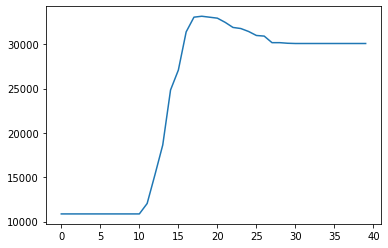

In [30]:
X = loadBalancer.X[-100,:]
X
pred = []
for n  in range(0,40):
    X_ = np.append(X[:-1], n)
    rewardHat = loadBalancer.model.predict(X_[None,:])[0]
    pred.append(rewardHat)

plt.plot(range(0,40), pred)

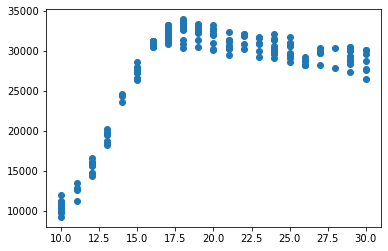

In [31]:
plt.scatter(env.log['numberOfServers'][::2], env.log['reward'])

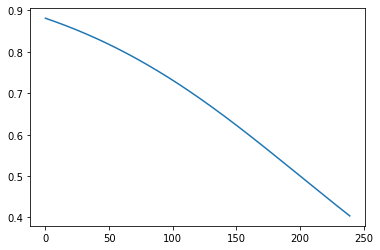

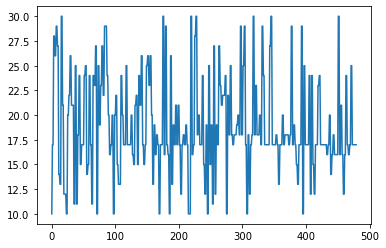

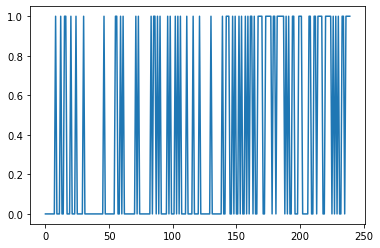

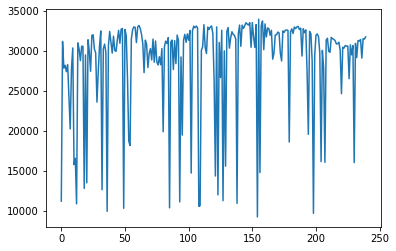

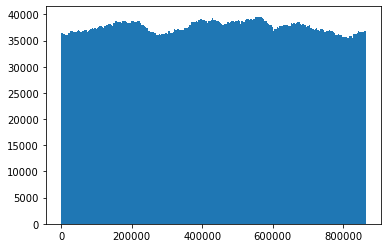

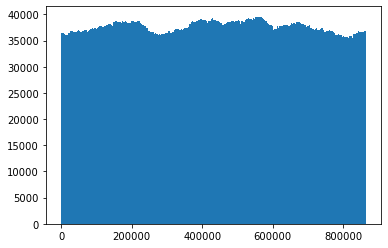

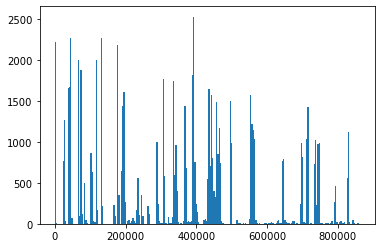

In [32]:
plt.plot(env.log['eta'])
plt.figure()
plt.plot(env.log['numberOfServers'])
plt.figure()
plt.plot(env.log['greedyEpsilonActionType'])
plt.figure()
plt.plot(env.log['reward'])
plt.figure()
plt.hist(env.logTime['arrivalEvent'], bins=int(stopTime/60/60));
plt.figure()
plt.hist(env.logTime['requestProcessed'], bins=int(stopTime/60/60));
plt.figure()
plt.hist(env.logTime['requestCancelled'], bins=int(stopTime/60/60));

In [ ]:
plt.plot(np.array(env.log['reward'])[np.array(env.log['greedyEpsilonActionType'])==1.0])
plt.plot(np.array(env.log['numberOfServers'])[np.array(env.log['greedyEpsilonActionType'])==1.0])

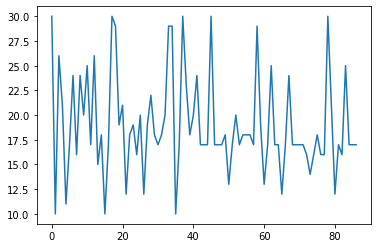

In [33]:
plt.plot(np.array(env.log['numberOfServers'][::2])[np.array(env.log['greedyEpsilonActionType'])==1.0])

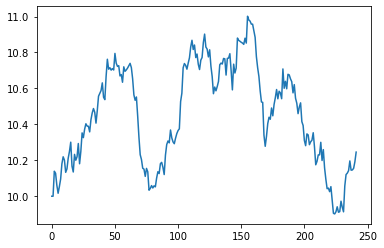

In [36]:
plt.plot(env.log['arrivalsPerSecond'])

Text(0, 0.5, 'y')

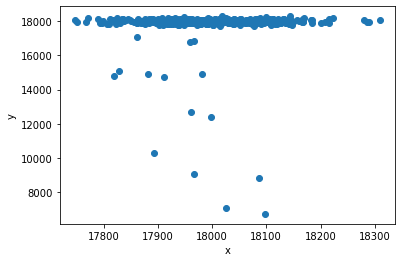

In [19]:
plt.scatter(loadBalancer.X[:-1,2],loadBalancer.y)
plt.xlabel('x')
plt.ylabel('y')

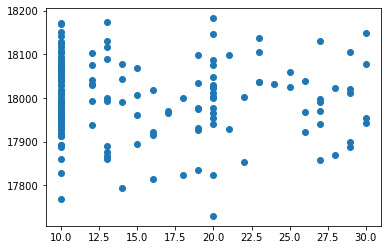

In [52]:
plt.scatter(env.log['numberOfServers'][0::2],env.log['reward'])

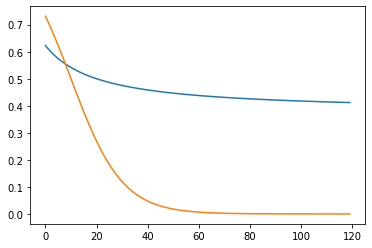

In [31]:

def sigmoid(x):
      return 1 / (1 + np.exp(-x))

x = np.arange(0,120,1)
plt.plot(x, sigmoid(2/(0.1*x+2)-0.5))
plt.plot(x, sigmoid(1-0.1*x))

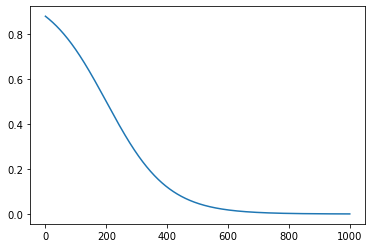

In [34]:
x = np.arange(0,1000,1)
plt.plot(x, sigmoid(2-0.01*x))